### **3. Работа с датами в DataFrame**

ПРИЗНАКИ ДАТЫ И ВРЕМЕНИ

→ При генерации новых признаков очень ценным может стать временной признак (признак даты и времени). Это особый тип данных, с которым приходится сталкиваться в большинстве задач по обработке данных. В реальных задачах часто нужно сравнивать даты, выделять день недели или час, вычислять различные интервалы между датами. 

Например, в наших данных об объектах недвижимости есть признак даты продажи — столбец Date. Из данного признака можно выделить массу полезной информации, например год, месяц или день недели продажи имущества. На рынке недвижимости, как известно, присутствует сезонность: есть периоды, когда недвижимость покупается чаще, а есть интервалы времени, когда рынок претерпевает застой, поэтому было бы неплохо учитывать эту сезонность при
 анализе рынка.

ФОРМАТ DATETIME

В жизни мы видим даты в привычных для нас форматах. Например, запись 01.12.18 обычно означает 1 декабря 2018 года. Однако для жителей США эта дата окажется 12 января 2018 года, так как для них привычнее сначала указывать номер месяца, а затем день. 

Многие выгрузки из систем и баз данных имеют свой служебный формат. Например, формат времени из разных систем может отличаться:
o	2018-11-09 15:45:21;
o	11/09/2018 3:45:20 PM;
o	2018-11-09T15:45:21.2984.
Для всех этих случаев необходимо задавать формат распознавания дат и уметь сравнивать их между собой. Для этого был создан единый способ обозначения даты и времени. 

Таким форматом в Pandas является формат datetime, который записывается как YYYY-MM-DD HH: MM: SS, то есть составляющие времени указываются в следующем порядке: год, месяц, день, час, минута, секунда.

В наших данных дата записана в виде DD/MM/YYYY, например 3/12/2017. Посмотрим на это:


In [ ]:
display(melb_df['Date'])

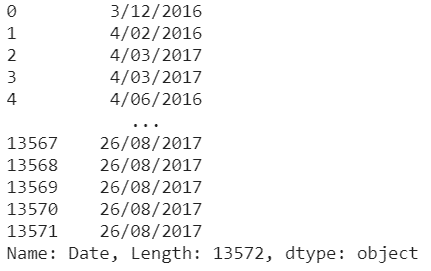


 
Для того чтобы преобразовывать столбцы с датами, записанными в распространённых форматах, в формат datetime, можно воспользоваться функцией pandas.to_datetime(). В нашем случае в функции нужно указать параметр dayfirst=True, который будет обозначать, что в первоначальном признаке первым идет день. Преобразуем столбец Date в формат datetime, передав его в эту функцию:


In [ ]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'], dayfirst=True)
display(melb_df['Date'])

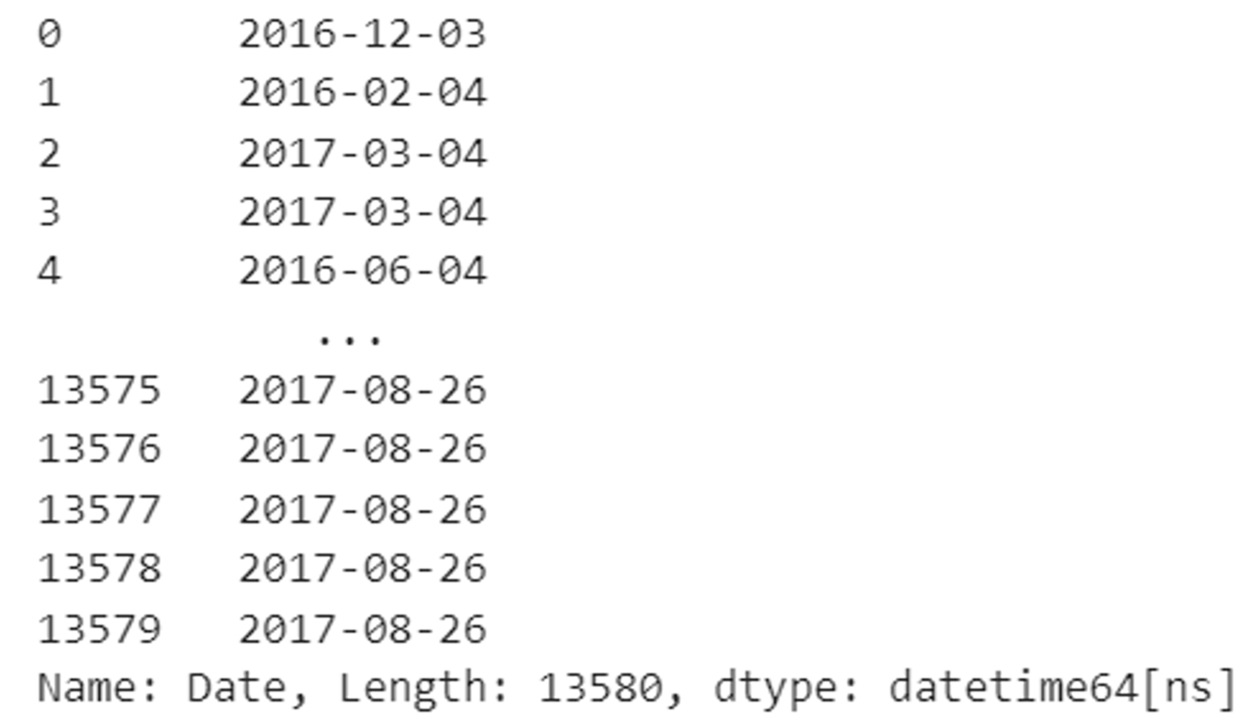


 
В результате мы переопределяем признак Date в формат datetime. При этом так как в изначальном варианте время не было указано, то и после преобразования оно опускается.

Стоит обратить внимание, что изменился тип данных для столбца Date, теперь его тип — datetime64. Рассмотрим несколько возможностей этого типа данных.



ВЫДЕЛЕНИЕ АТРИБУТОВ DATETIME

Тип данных datetime позволяет с помощью специального аксессора dt выделять составляющие времени из каждого элемента столбца, такие как:
	date — дата;

	year, month, day — год, месяц, день;

	time — время;

	hour, minute, second — час, минута, секунда;

	dayofweek — номер дня недели, от 0 до 6, где 0 — понедельник, 6 — воскресенье;

	day_name — название дня недели;

	dayofyear — порядковый день года;

	quarter — квартал (интервал в три месяца).
    
Например, обратившись по атрибуту dt.year в столбце Date, мы можем «достать» год продажи и понять, за какой интервал времени (в годах) представлены наши данные, а также на какой год приходится наибольшее число продаж:


In [ ]:
years_sold = melb_df['Date'].dt.year
print(years_sold)
print('Min year sold:', years_sold.min())
print('Max year sold:', years_sold.max())
print('Mode year sold:', years_sold.mode()[0])

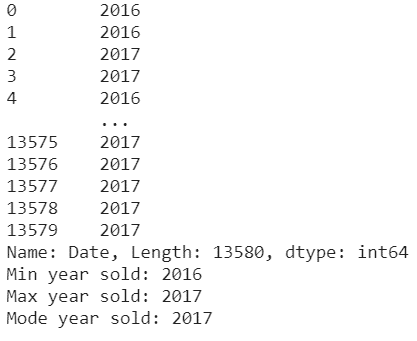


 
В результате обращения к атрибуту datetime melb_df['Date'].dt.year мы получаем объект Series, в котором в качестве значений выступают годы продажи объектов недвижимости. Мы можем занести результат в переменную year_sold и далее работать с ней как с обычным столбцом Series — вычислять максимум, минимум и модальное значение.

Из результатов видно, что данные представлены за интервал с 2016 по 2017 год и наибольшее количество объектов было продано в 2017 году.

*Примечание*: Так как модальных значений в столбце может быть несколько, метод mode() возвращает объект Series, даже если мода в данных только одна. Чтобы сохранить стилистику вывода информации о годе продажи и выводить только число, а не Series, мы обращаемся к результату работы метода mode() по индексу 0.

Теперь попробуем понять, на какие месяцы приходится пик продаж объектов недвижимости. Для этого выделим атрибут dt.month и на этот раз занесем результат в столбец (Как правило, результаты заносятся в таблицу (в новый столбец), когда предполагается, что столбец будет использоваться в дальнейшем. Промежуточные и тренировочные результаты будем записывать в переменные.)  MonthSale, а затем найдём относительную частоту продаж для каждого месяца от общего количества продаж — для этого используем метод value_counts() с параметром normalize (вывод в долях):


In [ ]:
melb_df['MonthSale'] = melb_df['Date'].dt.month
melb_df['MonthSale'].value_counts(normalize=True)

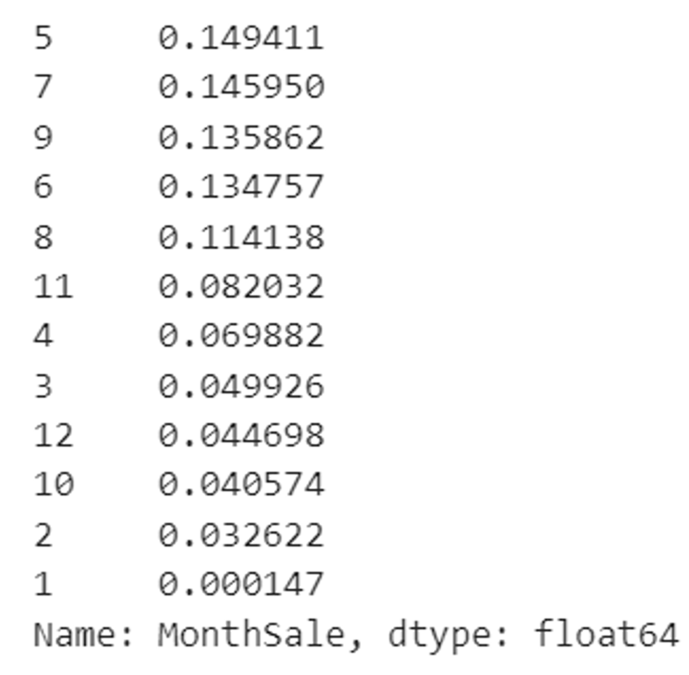


 
Из результатов становится ясно, что наибольшее количество продаж недвижимости приходится на май, июль и сентябрь (пятый, седьмой и девятый месяцы соответственно). Месяцами застоя при этом являются месяцы — октябрь, февраль и январь (десятый, второй и первый месяцы соответственно).



РАБОТА С ИНТЕРВАЛАМИ

Часто бывает такая ситуация, что необходимо вычислять интервалы между двумя временными промежутками. Например, можно вычислить, сколько дней прошло с 1 января 2016 года до момента продажи объекта. Для этого можно просто найти разницу между датами продаж и заявленной датой, представленной в формате datetime:


In [ ]:
delta_days = melb_df['Date'] - pd.to_datetime('2016-01-01') 
display(delta_days)

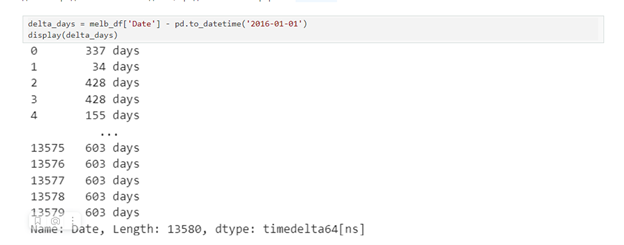


 
В результате мы получаем Series, элементами которой является количество дней, которое прошло с 1 января 2016 года. Обратите внимание, что данные такого формата относятся к типу timedelta https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html .
Чтобы превратить количество дней из формата интервала в формат целого числа дней, можно воспользоваться аксессором dt для формата timedelta и извлечь из него атрибут days:


In [ ]:
display(delta_days.dt.days)

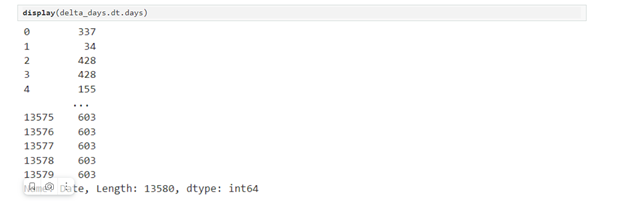


 
Рассмотрим другой пример. Давайте создадим признак возраста объекта недвижимости в годах на момент продажи. Для этого выделим из столбца с датой продажи год и вычтем из него год постройки здания. Результат оформим в виде столбца AgeBuilding:


In [ ]:
melb_df['AgeBuilding'] = melb_df['Date'].dt.year - melb_df['YearBuilt']
display(melb_df['AgeBuilding'])

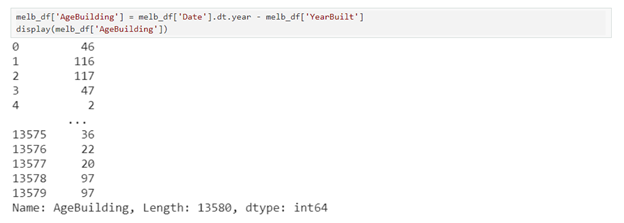


 
*Примечание*. Обратите внимание, что, так как года кодируются целым числом, в результате мы тоже получаем целочисленный столбец — тип int64 (а не timedelta).

На самом деле столбец AgeBuilding дублирует информацию столбца YearBuilt, так как, зная год постройки здания, мы автоматически знаем его возраст. Такие признаки не стоит оставлять вместе, поэтому оставим возраст здания, так как он является более наглядным, а год постройки удалим из таблицы:


In [15]:
melb_df = melb_df.drop('YearBuilt', axis=1)


✍ Мы рассмотрели основные концепции работы с временными признаками в DataFrame.
Временные признаки часто становятся важной частью анализа данных и построения моделей, особенно когда тематика связана со сферой, в которой присутствует непостоянство во времени (зависимость от месяца, дня недели, времени суток), например сфера продаж и услуг. Важно уметь работать с такими признаками, чтобы извлекать из представленных данных максимум полезной информации и строить качественные прогнозы.
А теперь предлагаем вам закрепить пройденный материал ↓


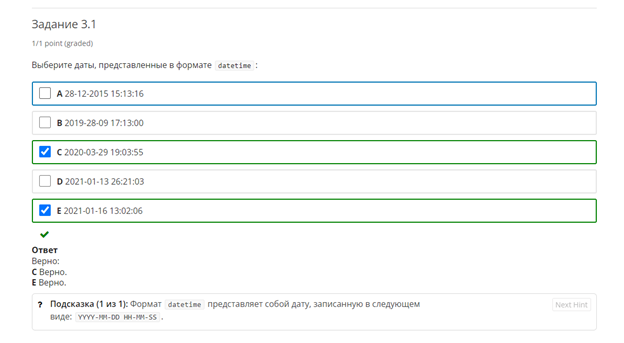

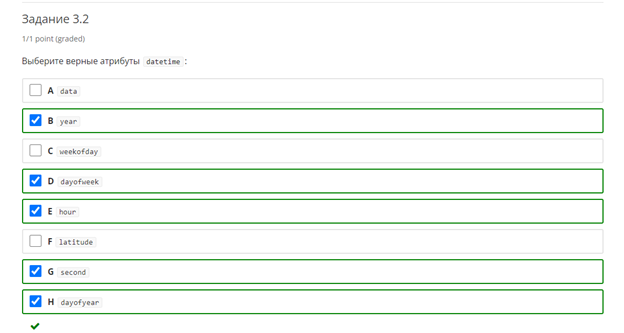

Задание 3.3

Создайте в таблице melb_df признак WeekdaySale (день недели). Найдите, сколько объектов недвижимости было продано в выходные (суббота и воскресенье), результат занесите в переменную weekend_count. В качестве ответа введите результат вывода переменной
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
(Воспользуйтесь атрибутом datetime dayofweek)
(12822)

In [10]:
import numpy as np

In [11]:
import pandas as pd

In [8]:
melb_data = pd.read_csv('data/melb_data_ps.csv')
melb_df = melb_data.copy()
melb_df['Date'] = pd.to_datetime(melb_df['Date'], dayfirst=True) #True даты анализируются в европейском стиле
melb_df['WeekdaySale'] = melb_df['Date'].dt.dayofweek
melb_df['Date'] = pd.to_datetime(melb_df['Date']) 
weekend_count = melb_df[(melb_df['WeekdaySale'] == 5) | (melb_df['WeekdaySale'] == 6)].shape[0]
print(weekend_count)

12822


ВВОДНЫЕ ДАННЫЕ ДЛЯ ВЫПОЛНЕНИЯ ЗАДАНИЙ 3.4-3.5

Вам представлены данные (в формате csv) об отчётах очевидцев НЛО в США за период с 1930 по 2020 год.

В данных есть следующие признаки:

"City" — город, где был замечен НЛО;
"Colors Reported" — цвет объекта;
"Shape Reported" — форма объекта;
"State" — обозначение штата;
"Time" — время, когда был замечен НЛО (данные отсортированы от старых наблюдений к новым). 
Прочитайте данные, сделайте преобразование времени к формату datetime и выполните задания ниже.

In [13]:
df = pd.read_csv('http://bit.ly/uforeports')
df['Time'] = pd.to_datetime(df.Time)
print(df['Time'].dt.year.mode()[0])

1999


Задание 3.5

Найдите средний интервал времени (в днях) между двумя последовательными случаями наблюдения НЛО в штате Невада (NV).

Чтобы выделить дату из столбца Time, можно воспользоваться атрибутом datetime date.

Чтобы вычислить разницу между двумя соседними датами в столбце, примените к нему метод diff().

Чтобы перевести интервал времени в дни, воспользуйтесь атрибутом timedelta days.

In [14]:
df['Date'] = df['Time'].dt.date
print(df[df['State']=='NV']['Date'].diff().dt.days.mean())

68.92932862190813
